# IPL Data Analysis - 1 #

## Import necessary libraries ##

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


## Load data into dataframe ##

In [2]:
ipl_dataframe_match = pd.read_csv('/home/admin-pc/Downloads/sr/matches.csv')
#read matches.csv
ipl_dataframe_delv = pd.read_csv('/home/admin-pc/Downloads/sr/deliveries.csv')
#read deliveries.csv
ipl_dataframe_delv.rename(columns={'match_id':'id'}, inplace=True)
#change col name of deliveries.csv
ipl_dataframe = pd.merge(ipl_dataframe_match, ipl_dataframe_delv,
                         on='id', how='outer')
#merge two df into one


## Part(1-a): Plot histogram for venue using matplotlib ##

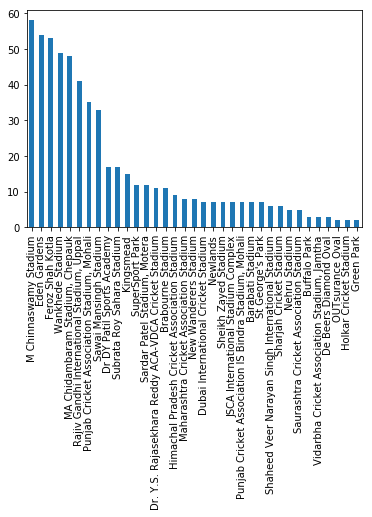

In [3]:
ipl_dataframe_match.venue.value_counts().plot(kind="bar")

## Part(1-b): Plot histogram for 'venue' and groupby 'season' ##

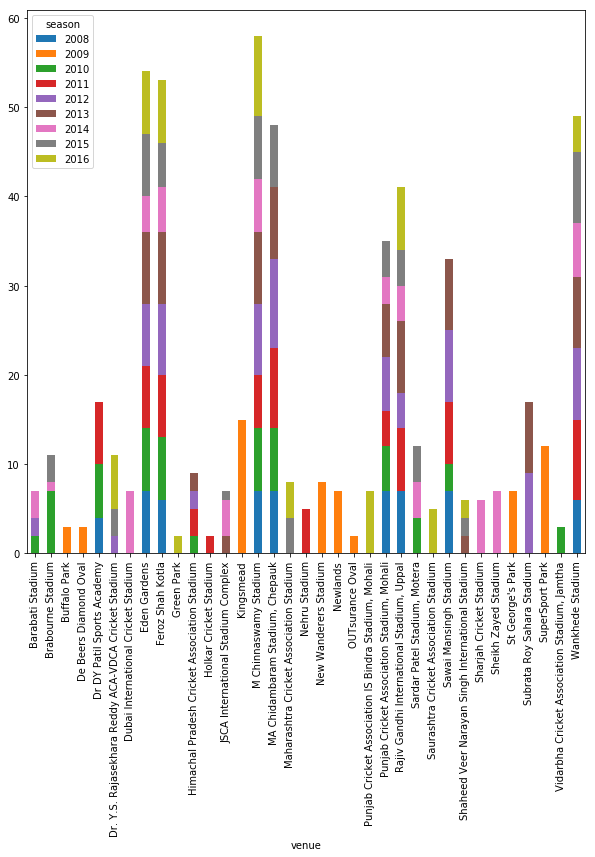

In [36]:
season_venue_df = ipl_dataframe_match[['season','venue']]
grouped_season_venue_df = season_venue_df.groupby('venue').season.value_counts().unstack(level=-1)
grouped_season_venue_df.plot(kind='bar', 
                             figsize=(10,10),
                             stacked=True 
                             )

## Part(2): Filter match id i.e. between 60 and 65 . Plot a histogram for venue ##

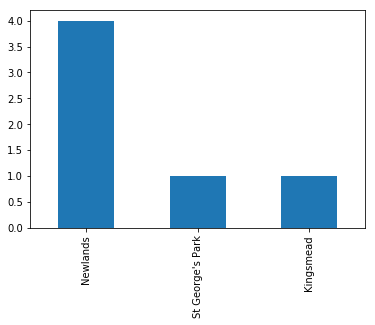

In [37]:
selected_id_df = ipl_dataframe_match[(ipl_dataframe_match['id']>=60) 
                                     & (ipl_dataframe_match['id']<=65)
                                     ]
#filter by required condition
selected_id_df.venue.value_counts().plot(kind="bar")

## Part(3): Stack-bar chart for innings 1 and 2 ##


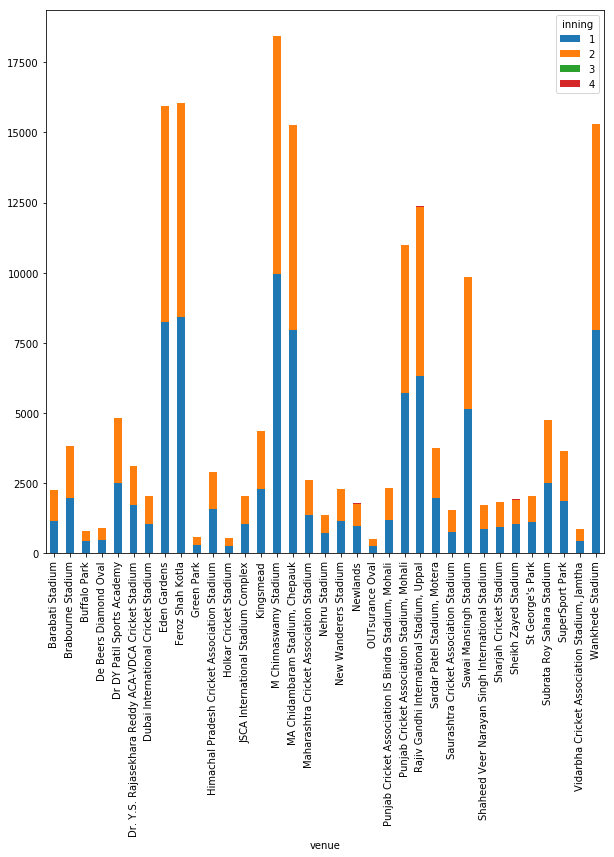

In [38]:
inning_df = ipl_dataframe[['inning','total_runs','venue']].groupby(['venue','inning']).total_runs.sum().unstack()
inning_df.plot(kind='bar', 
               figsize=(10,10),
                stacked=True
               )